# Activity Recognition using Cell Phone Accelerometers
## by Jennifer R. Kwapisz, Gary M. Weiss, Samuel A. Moore
### Data mining

In [1]:
# Loading all the needed modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

## Notes
There is a falsy line in the original file. The following bash code fixes that:
```
cat WISDM_ar_v1.1_raw.txt | awk -F',' 'BEGIN { OFS=","; RS=";"; ORS=";"; }{ if (NF==6) { print $0,"" } else if (NF==7) { print $0 }}' > raw_data_fixed.txt
```

In [2]:
root = '/Users/samiadrappeau/data_science/projets_perso/liberty_rider/'
dirin = 'WISDM/data_WISDM/'
#fid = root + dirin + 'raw_data_fixed.txt'
fid = root + dirin + 'WISDM_ar_v1.1_raw.txt'

In [3]:
# Loading data
df = pd.read_csv(fid, lineterminator=';' ,
    header=None ,names=['user','activity','timestamp','xaccel','yaccel','zaccel', 'NA'])
del df ['NA']

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Shape of data frame is:', df.shape, sep=" ")

Shape of data frame is: (1098209, 6)


In [5]:
df[['xaccel', 'yaccel', 'zaccel']].describe()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,xaccel,yaccel,zaccel
count,1.098208e+06,1.098208e+06,1.098208e+06
mean,6.628660e-01,7.255626e+00,4.110784e-01
std,6.849046e+00,6.746216e+00,4.754120e+00
min,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,1.995000e+01,2.004000e+01,1.961000e+01


In [6]:
df.head()

,user,activity,timestamp,xaccel,yaccel,zaccel
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.503953
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.953424
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.081722
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.023717
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


In [7]:
def create_segments(df):
    ''' Convert timestamp to second, sort by user and time and create 10-second segments
    '''
    # Converting timestamp in nano-second to second
    df['time_seconds'] = df['timestamp']*1e-9
    # Sorting data by user and timestamp
    df = df.sort_values(by=['user', 'time_seconds'])
    # create segments
    segment_length = 200
    df['seq'] = range(df.shape[0])
    df['segment'] = df.groupby(['user','activity'])['seq'].apply(lambda x: x%segment_length == 0).fillna(0).cumsum()
    return df

In [8]:
df_segmented = create_segments(df)

In [9]:
df_segmented.head()

,user,activity,timestamp,xaccel,yaccel,zaccel,time_seconds,seq,segment
941964,1,Walking,4.991922e+12,0.69,10.80,-2.03,4991.922345,0,True
941965,1,Walking,4.991972e+12,6.85,7.44,-0.50,4991.972333,1,1
941966,1,Walking,4.992022e+12,0.93,5.63,-0.50,4992.022351,2,1
941967,1,Walking,4.992072e+12,-2.11,5.01,-0.69,4992.072339,3,1
941968,1,Walking,4.992122e+12,-4.59,4.29,-1.95,4992.122358,4,1


In [10]:
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#plt.plot(df_segmented.loc[(df_segmented['user'] == 2) & (df_segmented['activity'] == 'Walking')]['timestamp'].diff(), '*')
#ax1.set_ylim([-0.5*1e9,0.2*1e9])

In [11]:
print('Shape of data frame is now:', df_segmented.shape, sep=" ")

Shape of data frame is now: (1098209, 9)


In [12]:
#df_segmented.head(201)

In [13]:
# Extracting a user activity
df_user = df_segmented[df_segmented.user == 33]

In [14]:
print(df_user.head())
print(df_user.shape)

       user  activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
462771   33  Standing  5.043823e+11    0.11    9.89    1.46    504.382335   
462772   33  Standing  5.044323e+11    0.11    9.92    1.46    504.432262   
462773   33  Standing  5.044823e+11    0.08    9.92    1.46    504.482280   
462774   33  Standing  5.045323e+11    0.04    9.89    1.46    504.532298   
462775   33  Standing  5.045823e+11    0.08    9.92    1.46    504.582316   

           seq segment  
462771  928520    4643  
462772  928521    4643  
462773  928522    4643  
462774  928523    4643  
462775  928524    4643  
(29453, 9)


In [15]:
df_user_activity = df_user[df_user.activity == 'Sitting']

In [16]:
print(df_user_activity.head())
print(df_user_activity.shape)

       user activity     timestamp  xaccel  yaccel  zaccel  time_seconds  \
464383   33  Sitting  6.124323e+11    4.99    3.02    7.86    612.432323   
464384   33  Sitting  6.124824e+11    5.22    3.26    8.05    612.482402   
464385   33  Sitting  6.125323e+11    5.24    3.15    8.16    612.532329   
464386   33  Sitting  6.125824e+11    5.33    3.57    8.05    612.582378   
464387   33  Sitting  6.126324e+11    5.63    2.98    7.46    612.632365   

           seq segment  
464383  930132    4651  
464384  930133    4651  
464385  930134    4651  
464386  930135    4651  
464387  930136    4651  
(3248, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bfa6828>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x11d6e8860>]], dtype=object)

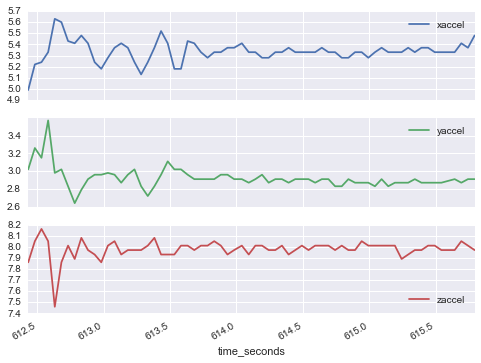

In [17]:
df_user_activity[df_user_activity.segment==4651].plot(x='time_seconds', y=['xaccel',  'yaccel',  'zaccel'], subplots=True, layout=[3,1])

In [18]:
print(df_user_activity['segment'].unique())
# FIXME remove this for loop with a lambda function
for x in df_user_activity.segment.unique():
    print(df_user_activity[df_user_activity.segment == x][['xaccel','yaccel', 'zaccel']].describe())

[4651 4652 4653 4654 4655 4656 4657 4658 4659 4660 4661 4662 4663 4664 4665
 4666 4667]
          xaccel     yaccel     zaccel
count  68.000000  68.000000  68.000000
mean    5.337206   2.921324   7.977794
std     0.095384   0.118144   0.082694
min     4.990000   2.640000   7.460000
25%     5.317500   2.870000   7.970000
50%     5.330000   2.910000   7.990000
75%     5.370000   2.960000   8.010000
max     5.630000   3.570000   8.160000
           xaccel      yaccel      zaccel
count  200.000000  200.000000  200.000000
mean     5.589250    2.826100    7.853000
std      0.105373    0.066678    0.060857
min      5.240000    2.560000    7.670000
25%      5.560000    2.790000    7.820000
50%      5.600000    2.830000    7.860000
75%      5.630000    2.870000    7.890000
max      5.940000    3.150000    8.010000
           xaccel      yaccel      zaccel
count  200.000000  200.000000  200.000000
mean     5.596600    2.839700    7.849550
std      0.039829    0.050004    0.037501
min      5.4800

In [19]:
print(len(df_segmented['segment'].unique()),len(df_segmented['user'].unique()))
range((df_segmented['segment'].unique()).shape[0])
print(df_segmented.columns)

5492 38
Index(['user', 'activity', 'timestamp', 'xaccel', 'yaccel', 'zaccel',
       'time_seconds', 'seq', 'segment'],
      dtype='object')


In [20]:
def create_new_features(df_old):
    # Sorting data by user and segment
    accel_cols = ['xaccel','yaccel','zaccel']
    df_new = df_old.loc[:,accel_cols+['user','segment','activity']].groupby(['user', 'segment','activity'])
    
    # acceleration means
    means = df_new[accel_cols].apply(lambda x: np.mean(x))
    
    # acceleration standard deviation
    sds = df_new[accel_cols].apply(lambda x: np.std(x))
    
    # avg absolute difference
    avg_absolute_diff_1 = df_new[accel_cols[0]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diff_2 = df_new[accel_cols[1]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diff_3 = df_new[accel_cols[2]].apply(lambda x: np.mean(np.absolute(x-np.mean(x))))
    avg_absolute_diffs = [ avg_absolute_diff_1, avg_absolute_diff_2, avg_absolute_diff_3 ]
    
    # avg resultant accel
    # FIXME problem here because x are a collection of Series.
    avg_resultant_accel = df_new[accel_cols].apply(lambda x: np.mean(np.sqrt(x.iloc[:,0]**2+
                                                                        x.iloc[:,1]**2+
                                                                        x.iloc[:,2]**2)))
    # time between peaks
    between_peaks_1 = df_new[accel_cols[0]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks_2 = df_new[accel_cols[1]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks_3 = df_new[accel_cols[2]].apply(lambda x: np.abs(np.argmax(x)-np.argmin(x)))
    between_peaks = [ between_peaks_1, between_peaks_2, between_peaks_3 ]
    
    
    # concat columns
    X = pd.concat([means, sds] + avg_absolute_diffs + between_peaks + [avg_resultant_accel], axis=1)
    
    X.columns = ['xavg', 'yavg', 'zavg','xstanddev','ystanddev', 'zstanddev','xabsdiff', 'yabsdiff', 'zabsdiff', 'xpeak', 'ypeak', 'zpeak', 'resultant']
    X = X.reset_index(level=['user', 'segment', 'activity'])
    X.drop('segment', axis=1, inplace=True)
    X = X[['user',\
           'xavg', 'yavg', 'zavg',\
           'xpeak', 'ypeak','zpeak',\
           'xabsdiff', 'yabsdiff', 'zabsdiff',\
           'xstanddev', 'ystanddev', 'zstanddev',\
           'resultant',\
           'activity']]
    return X

In [21]:
df_new_feats = create_new_features(df_segmented)

TypeError: Series.name must be a hashable type

In [ ]:
df_new_feats[(df_new_feats.user==33) & (df_new_feats.activity=='Jogging')].head()

In [ ]:
df_new_feats.columns

In [ ]:
df_new_feats.columns

In [ ]:
df_new_feats.head()

In [ ]:
df_new_feats[df_new_feats.user == 1].head()

In [ ]:
df_new_feats.columns